# Get more from Crime Rate data and other socio-economic indicators with Pyinterpolate

---

## Part 2: Explore and transform crime rate counts


### Block 1 - imports

In [1]:
import geopandas as gpd
import pandas as pd
import pyinterpolate as ptp

import matplotlib.pyplot as plt

### Block 2 - read and analyze crime rates data

In [2]:
gdf = gpd.read_file('data/crime_rates_2019.shp')

In [3]:
# Take a look into a few random records

gdf.sample(5)

,Code,Name,All,Criminal,Financial,SecurityAl,SecurityRo,HealthAndL,Materials,Population,geometry
108,3062,Powiat m.Konin,1712,1181,340,156,141,46,734,73522,"POLYGON ((446053.400 484275.535, 446051.330 48..."
250,0614,Powiat pu?awski,1878,1224,357,247,238,44,688,113173,"POLYGON ((705169.870 412610.897, 705172.041 41..."
340,0605,Powiat janowski,574,365,70,119,107,16,102,45709,"POLYGON ((749612.699 336873.347, 749621.577 33..."
55,0207,Powiat kamiennogórski,947,750,66,100,87,23,398,43239,"POLYGON ((277907.504 324307.375, 277931.474 32..."
315,0414,Powiat ?wiecki,1418,806,278,257,238,26,571,98952,"POLYGON ((437830.924 613072.370, 437819.565 61..."


In [4]:
# Core statistics

gdf.describe()

,All,Criminal,Financial,SecurityAl,SecurityRo,HealthAndL,Materials,Population
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,3.800000e+02
mean,2096.202632,1334.692105,493.071053,204.797368,187.542105,43.634211,994.844737,1.010068e+05
std,3490.528307,2591.969861,867.368381,173.651483,153.895609,54.182438,2164.824078,1.198884e+05
min,293.000000,152.000000,26.000000,44.000000,38.000000,1.000000,87.000000,1.991400e+04
25%,898.250000,523.500000,123.000000,122.000000,113.000000,20.750000,310.500000,5.497975e+04
50%,1301.000000,795.500000,238.500000,173.000000,158.000000,30.000000,495.500000,7.600700e+04
75%,2034.250000,1236.000000,487.750000,238.750000,217.750000,47.250000,922.000000,1.114018e+05
max,50387.000000,37413.000000,9776.000000,2413.000000,2118.000000,526.000000,32906.000000,1.790658e+06


In [5]:
# CRS

gdf.crs

<Derived Projected CRS: PROJCS["ETRF2000-PL / CS92",GEOGCS["ETRS89",DATUM[ ...>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Block 3 - histogram of raw counts

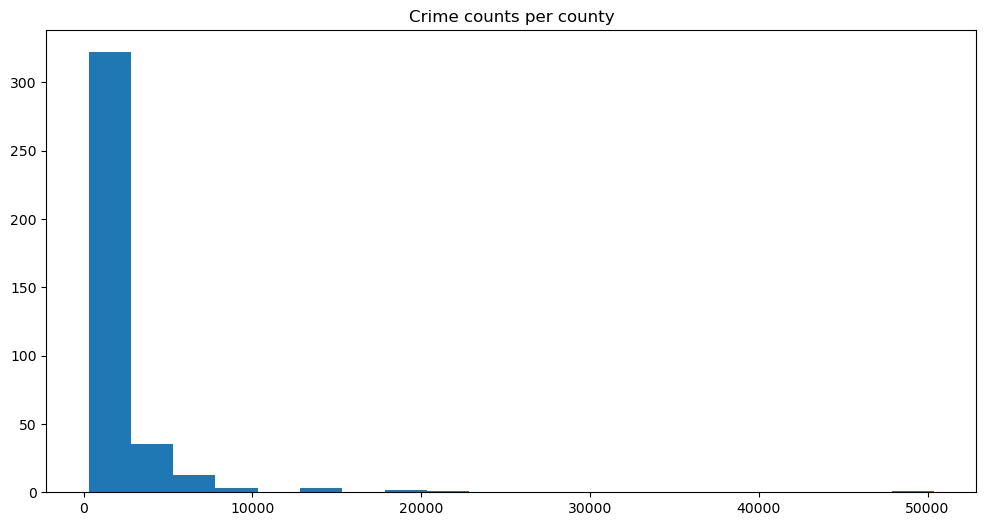

In [6]:
plt.figure(figsize=(12, 6))
gdf['All'].hist(grid=False, bins=20)
plt.title('Crime counts per county')
plt.show()

### Block 4 - map of raw counts

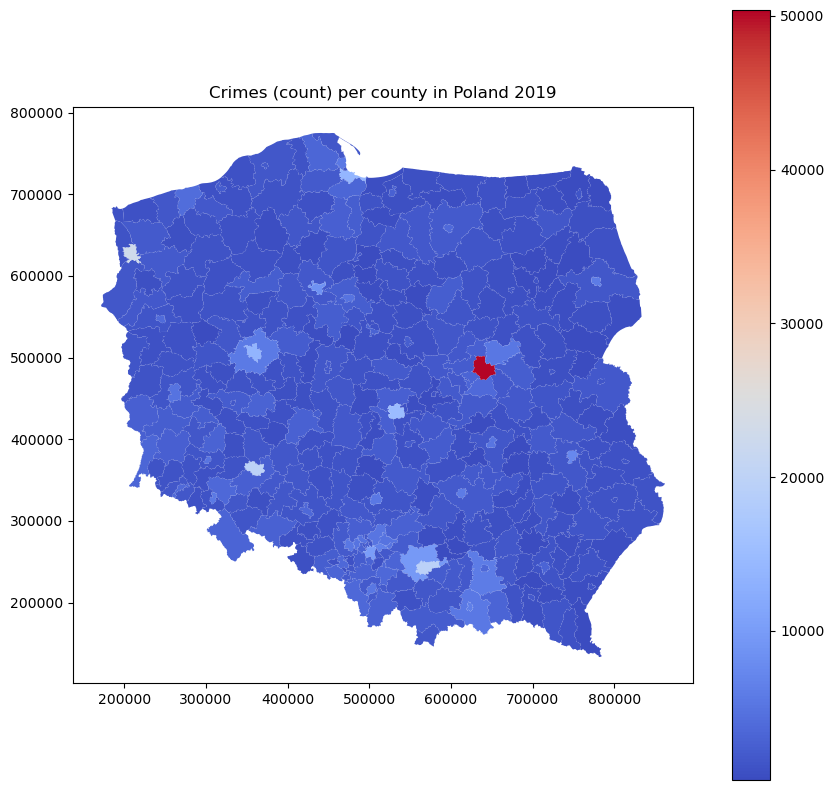

In [7]:
gdf.plot(figsize=(10, 10), column='All', cmap='coolwarm', legend=True)
plt.title('Crimes (count) per county in Poland 2019')
plt.show()

### Block 5 - transform counts to rates and show histogram

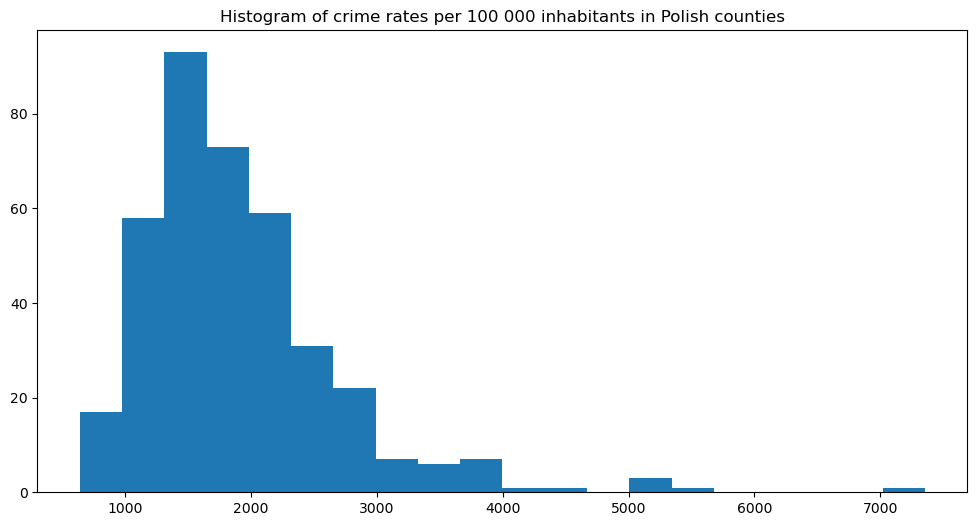

In [8]:
gdf['Crime Rate'] = (gdf['All'] / gdf['Population']) * 100000

plt.figure(figsize=(12, 6))
gdf['Crime Rate'].hist(grid=False, bins=20)
plt.title('Histogram of crime rates per 100 000 inhabitants in Polish counties')
plt.show()

In [9]:
gdf['All'].corr(gdf['Population'])  # Strong relationship

0.9511721620813209

### Block 6 - map of crime rates

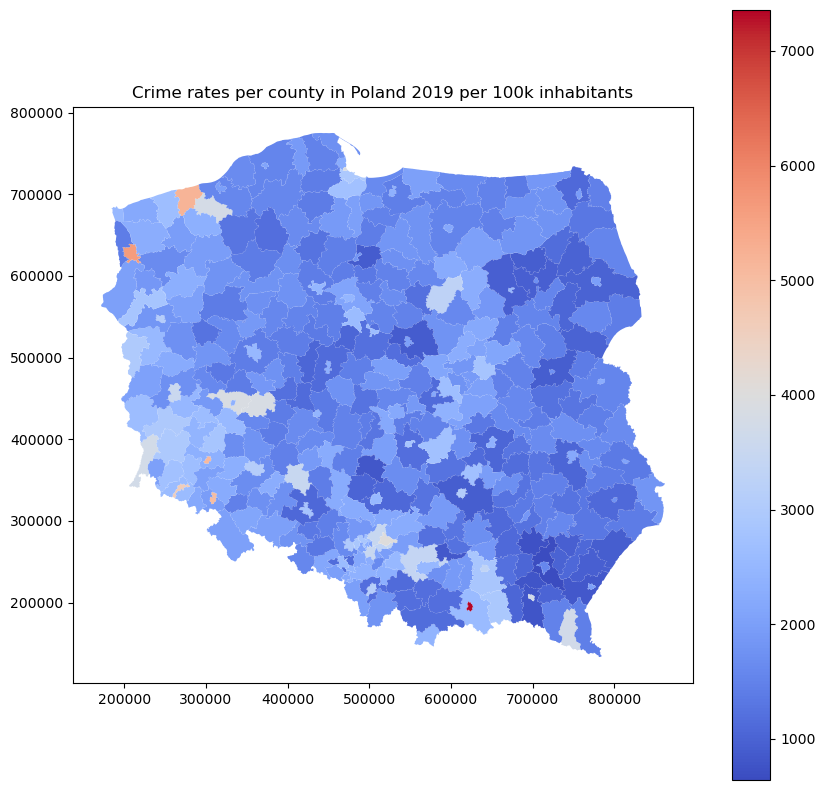

In [10]:
gdf.plot(figsize=(10, 10), column='Crime Rate', cmap='coolwarm', legend=True)
plt.title('Crime rates per county in Poland 2019 per 100k inhabitants')
plt.show()

### Block 7 - save rates to file

In [11]:
df = gdf[['Crime Rate', 'Population', 'geometry', 'Code']]
df.columns = ['CrimeRate', 'Pop', 'geometry', 'Code']
df.to_file('data/crimerates.shp')

---